# Assignment Sheet 2
## Solution examples

## Task 2.1) 
Given is a seven-armed bandit, as introduced in the lecture.

The first arm shall sample its reward uniformly from the interval $[-4, 3)$.

The second arm shall sample its reward uniformly from $[1, 5)$.

The third arm shall sample its reward uniformly from the interval $[2, 3)$.

The fourth arm shall sample its reward uniformly from $[–2, 5)$.

The fifth arm shall sample its reward uniformly from $[0, 4)$.

The sixth arm shall sample its reward uniformly from $[1, 4)$.

The seventh arm shall sample its reward uniformly from $[3, 7)$.

### What is the expected reward when actions are chosen uniformly?

First, we calculate the expected value of each arm individually:

Arm 1: $0.5\cdot(-4+3)=-0.5$

Arm 2: $0.5\cdot(1+5)=3$

Arm 3: $0.5\cdot(2+3)=2.5$

Arm 4: $0.5\cdot(-2+5)=1.5$

Arm 5: $0.5\cdot(0+4)=2$

Arm 6: $0.5\cdot(1+4)=2.5$

Arm 7: $0.5\cdot(3+7)=5$

Clearly, pulling 7 is the optimal action.

Finally, we form the expectation over sampling these arms uniformly:

$\frac{1}{7}\cdot (-0.5) + \frac{1}{7}\cdot 3 + \frac{1}{7}\cdot 2.5 + \frac{1}{7}\cdot1.5 + \frac{1}{7}\cdot2 + \frac{1}{7}\cdot2.5 + \frac{1}{7}\cdot5 \approx 2.29$

## Task 2.2)
Implement the seven-armed bandit from $\textbf{2.1)}$!

Initialize $Q(a_i)=0$ and chose $2000$ actions according to an $\epsilon$-greedy selection strategy ($\epsilon=0.1$).

Update your action values by computing the sample average reward of each action recursively.
For every $100$ actions show the percentage of choosing arm $1$, arm $2$, arm $3$, arm $4$, arm $5$,
arm $6$ and arm $7$ as well as the resulting average reward. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2020)

def arm1():
    return np.random.uniform(-4,3)
def arm2():
    return np.random.uniform(1,5)
def arm3():
    return np.random.uniform(2,3)
def arm4():
        return np.random.uniform(-2,5)
def arm5():
    return np.random.uniform(0,4)
def arm6():
    return np.random.uniform(1,4)
def arm7():
    return np.random.uniform(3,7)

arm = [arm1, arm2, arm3, arm4, arm5, arm6, arm7]

In [2]:
NUM_ITER = 2000

Q = np.zeros(7) #initialize Q with 0
count = np.zeros(7) #this array counts how many times we selected each arm
countPrev = count.copy() #using this array we can calculate how often each arm was selected in the last 100 steps
rewards = np.empty(NUM_ITER) #here we can save the reward we get each iteration
selectPercentage = np.empty((7,int(NUM_ITER/100)),'float') #here we can save the percentage of selecting each arm


for t in range(NUM_ITER):
    eps = np.random.uniform() #rollout a number to compare to epsilon
    if eps < 0.1: #this is true with probability epsilon
        a = np.random.randint(0,7) #exploratory action
    else:
        a = np.argmax(Q) #exploitative action
    count[a] += 1 #increase the count for that arm
    reward = arm[a]() #sample that arm
    Q[a] += (reward-Q[a])/count[a] #update the Q value of that arm
    
    rewards[t] = reward #save the reward for later plotting
    
    
    if t > 0 and (t+1)%100 == 0: #save the arm selection proportions for later plotting
        for a in range(7):
            selectPercentage[a][int(t/100)] = 0.01*(count[a] - countPrev[a])
        countPrev = count.copy()

Note that we follow lecture $2$, slide $38$ and update $Q$ according to

$Q_{t+1} = Q_{t} + \frac{1}{t+1}\cdot(r_{t+1} - Q_t)$.

In our case, the target's weight $\frac{1}{t+1}$ is represented by $\frac{1}{count[a]}$, which we increment before using it in the update.

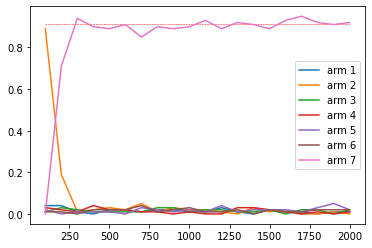

In [3]:
plt.plot(np.arange(100,NUM_ITER+1,100), (0.9+0.1/7)*np.ones_like(selectPercentage[0]),'r--', linewidth = 0.5)
for a in range(7):
    plt.plot(np.arange(100,NUM_ITER+1,100), selectPercentage[a], label = "arm " + str(a+1))
plt.legend()
plt.show()

If learning was successful, our agent should select the optimal action with a probability of $1-\epsilon$. In the remaining exploratory actions, the optimal action can be selected with a probability $\epsilon \cdot \frac{1}{7}$. The sum of this should be the percentage of selecting the optimal action.

In the above plot, we plot this expectation as a baseline (dashed red line). After some iterations, We can see that arm $7$ is selected more or less exactly as often as we believed it would. 

Below, we plot the running reward. Given $r$, the rewards vector from our code, the running reward $r_{running}$ is given by

$r_{running}[t] = \frac{1}{t+1}\cdot\sum_{i=0}^{t} r[i]$.

It is simply the average over the rewards up until that iteration. I prefer showing this number as it moves more slowly than, for example, the average reward over the last $100$ steps, which is very jittery and harder to interpret.

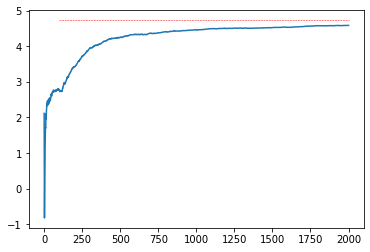

In [4]:
optReward = 4.73
plt.plot(np.arange(100,NUM_ITER+1,100), optReward*np.ones_like(selectPercentage[0]),'r--', linewidth = 0.5)
runningAverage = np.divide(np.cumsum(rewards),np.arange(1,NUM_ITER+1))
plt.plot(np.arange(1,NUM_ITER+1), runningAverage)
plt.show()

After learning has converged, our agent should select the most rewarding action $90\%$ of the time. In these cases, we expect a reward of $5$. The remaining actions are exploratory, and thus yield an expected reward of about $2.29$ as calculated in $\textbf{2.1)}$. In summary, we therefore predict the running average should converge to $0.9\cdot5+0.1\cdot2.29\approx4.73$. We plot this value as a baseline (in dashed red) and see that our agent stabilizes near it.

In [5]:
print("Resulting Q:", np.round(Q,3))

print("Arm selection counts:", count)

Resulting Q: [-0.989  2.933  2.407  1.834  1.618  2.543  5.   ]
Arm selection counts: [  30.  137.   31.   28.   36.   32. 1706.]


Note that the individual expectations from $\textbf{2.1)}$ are not found yet. This is due to the low probability of exploratory actions. While arm $7$ has been greedily sampled very many times, the other arms have only been tested tens of times. Considering this, it is not very surprising that the agent has found the expected return of arm $7$ almost exactly, but is still relatively clueless regarding the other arms. 

## Task 2.3)
Consider a student taking an exam, which consists of $k$ tasks.
For simplicity, we assume that the tasks $i = 1, … , k$ can either be solved, which results in the full
number $r_i$ of points, or not be solved, resulting in zero points ($r_i = 0$).

After working on a task, the student knows whether the task has been solved or not.

The student may attempt to solve each task a second time, but only when it has not been solved
before.

For each attempt, the probability $p_i$ of solving the task shall be independent. It depends only on the difficulty of the task and is as follows:

| Task $\textit{i}$| Points $r_i$ | Solution probability $p_i$|
|------------------|--------------|-------------------------------------------|
|   1              | 8            |    0.15                                   |
|   2              | 6            |    0.4                                    |
|   3              | 10           |    0.25                                   |
|   4              | 2            |    0.6                                    |
|   5              | 7            |    0.35                                   |
|   6              | 3            |    0.5                                    |
|   7              | 20           |    0.2                                    |

### Formulate this problem as a Markov Decision Process! 

To specify a Markov Decision Process, we need to define a set of states $S$ and a set of actions $A(s)$, with $s\in S$.

$S$: The state space needs to sufficiently encode the history of our system. In this case, it is important not only to save which tasks have been solved (necessary because the student can only work on unsolved task), but also if a task has been attempted before (necessary because we have a maximum number of attempts). Therefore, we can simply define $s = (solved, attempted)$, with

$solved := (i_1, i_2, ..., i_7)$, $i_j \in \{0,1\}$, $i_j = 1 \iff$ task j has been solved

$attempted := (k_1, k_2, ..., k_7)$, $k_j \in \{0,1,2\}$, $k_j :=$ number of attempts on task j.

Below, we will refer to $i_j$ as $solved_j$ and $k_j$ as $attempted_j$. 

$A(s)$: Intuitively, the actions are to attempt to work on a task. Of course, this is only possible if the task has not been solved yet and not been attempted too often. Keeping this in mind:

$A(s) \subseteq \{a_1, a_2, ..., a_7\}$, with $a_j$ the action of attempting to work on task j and

$a_j \in A(s) \iff solved_j \neq 1 \land attempted_j \leq 1$.

Next, we need to define transition probabilities $P_{ss'}^a$. Note that we define this only for actions and state transitions which are possible. For example, no action can 'unsolve' a task. Furthermore we cannot attempt task previously solved or twice failed. For these combinations of situations and actions, consider $P_{ss'}^a = 0$.

For $P_{ss'}^{a_j}$ with $solved_i = solved'_i \land attempted_i = attempted'_i$ for $i\neq j$, $attempted'_j = attempted_j + 1$:

$P_{ss'}^{a_j} := p_j$ if $solved_j \neq solved'_j$

$P_{ss'}^{a_j} := 1- p_j$ if $solved_j = solved'_j$

Finally, we can define the reward probabilities. As before, we demand $solved_i = solved'_i \land attempted_i = attempted'_i$ for $i\neq j$, $attempted'_j = attempted_j + 1$ to restrict our attention to plausible transitions. In this case, we get:

$R_{ss'}^{a_j} := r_j$ if $solved_j \neq solved'_j$.

In all other combinations of $s$,$s'$ and $a$, $R_{ss'}^{a_j} := 0$

## Task 2.4)
The student considers two policies for choosing the tasks:

$\pi_A$: work on the tasks in sequential order, according to index $i$.

$\pi_B$: work on the tasks in the order of increasing difficulty (decreasing solution probability).

In both cases, the first non-solved task will be attempted again.

### Compare the expected return of both policies! 

This problem is a little easier than the scenario described above. Because only the first task that has been failed is attempted again, we do not need to store the number of attempts in each state on a per task basis. Here, it is sufficient to store if the student has used the second attempt so far. 

As usual, import required packages and set up the framework for this problem.

In [6]:
rewards = np.array([8,6,10,2,7,3,20]) #r_i
success_probabilities = np.array([0.15,0.4,0.25,0.6,0.35,0.5,0.2]) #p_i
attempt = 0 #see above text
completed_tasks = np.zeros_like(rewards) #solved component of state as in 2.3)
passing_score = np.sum(rewards)*0.5 #needed to determine the probability of passing, not required here

If we specify a policy, that is, a rule $\pi(s,a)$ that maps each state $s$ to a distribution over available actions $a \in A(s)$, we can calculate the expected return following that policy and the probability of passing the exam by examining all possible trajectories following that policy.

To simplify this problem, we could assume that our given $\pi$ is a deterministic policy. Then, each state has at most $2$ outcomes; one for failing the selected task and one for successfully solving it. This is readily represented by a binary tree, each edge weighted by the success probability (or its complement) of the task corresponding to the action selected by $\pi$. 

Each leaf of this tree is reached with a probability determined by the products of the edges leading there. We could then identifiy each leaf (which represents a terminal state) that has enough tasks solved to achieve a passing score, and sum up over the probabilities of these leaves being reached. This probability is then equal to the probability of passing the exam. Furthermore, we can read off the total score at each leaf. This can also be weighted by the probability of reaching the leaf. A weighted sum over all leaves in this manner yields the expected return.

As described above we build a binary search tree for the deterministic policies described in this task. We represent the policy as a queue of tasks to be sequentially attempted. When a task is solved or has been failed when the second attempt is no longer available, it is popped from the front of the queue. Then, the next tasks are attempted until the queue is empty. We are only interested in the leaves of the search tree and can assign a probability of 1 to leaves that represent states with enough points to pass the exam. This probability (technically not part of the task) is propagated up to the root of the tree along with the total number of points at the leaf. 

This is most intuitively implemented using a recursion that stops when terminal states are reached.

In [7]:
def priority_agent_expected_reward(r, p, attempted, solved, pi):
    expected_sum = np.array([0.0, 0.0])
    #Are we in a terminal state?
    if(len(pi) == 0):
        #Value of the whole trajectory.
        trajectory_reward = np.sum(r[solved > 0]) #sum up over the points for completed tasks
        passing_probability = 0.0
        #Is the value of this trajectory sufficient to pass the exam?
        if trajectory_reward >= passing_score:
            passing_probability = 1.0
        return np.array([trajectory_reward, passing_probability]) #send this tuple upwards towards the root
    #If the state is not terminal:
    else:
        task = pi[0] #Determine the task that we must now work on.
        solved_success = solved.copy() 
        solved_success[task] += 1 #This would be s' if we succeed in solving the task
        if(attempted != 0):
            #No second attempt is left, we must pop the task from the queue no matter if we fail or not
            success_score = priority_agent_expected_reward(r, p, attempted, solved_success, np.delete(pi, [0]))
            failure_score = priority_agent_expected_reward(r, p, attempted, solved, np.delete(pi, [0]))
            expected_sum += p[task] * success_score + (1 - p[task]) * failure_score
        else:
            #If the student fails here, the task can be attempted again
            success_score = priority_agent_expected_reward(r, p, attempted, solved_success, np.delete(pi, [0]))
            failure_score = priority_agent_expected_reward(r, p, attempted + 1, solved, pi)
            expected_sum += p[task] * success_score + (1 - p[task]) * failure_score
        
        #For each non-terminal state, two states can result from taking the action; 
        #one if we succeed, one if we fail.
        #For this reason, the expected sum decomposes into a success_score and a failure_score each turn
        return expected_sum

Because our $r_i$ and $p_i$ are zero-indexed while we represent $\pi$ by a list of task numbers, we define a little helper function to transform the task numbers.

In [8]:
def policify(numpy_array):
    return numpy_array - 1

Now we can call this function on $\pi_A$ and $\pi_B$.

In [9]:
policy_a = np.array([1, 2, 3, 4, 5, 6, 7])
policy_b = np.array([4, 6, 2, 5, 3, 7, 1])
print('The expected [return, success] of the policy', policy_a,'is',
      priority_agent_expected_reward(rewards, success_probabilities, attempted=0, solved=completed_tasks, pi=policify(policy_a)))
print('The expected [return, success] of the policy', policy_b,'is',
      priority_agent_expected_reward(rewards, success_probabilities, attempted=0, solved=completed_tasks, pi=policify(policy_b)))

The expected [return, success] of the policy [1 2 3 4 5 6 7] is [16.627435  0.180866]
The expected [return, success] of the policy [4 6 2 5 3 7 1] is [16.917592  0.194384]


Evidently, $\pi_B$ has a slightly higher expected return than $\pi_A$. The probability of passing the exam is slightly higher when following $\pi_B$.

In [10]:
expected_rewards = np.multiply(rewards,success_probabilities)
print(expected_rewards)

[1.2  2.4  2.5  1.2  2.45 1.5  4.  ]


Set $\pi_C$ to the priority list of tasks ordered by decreasing expected reward. Then, calculate its return as in $\textbf{2.3)}$. 

In [11]:
policy_c = np.array([7, 3, 5, 2, 6, 1, 4])
print('The expected [return, success] of the policy', policy_c,'is', 
      priority_agent_expected_reward(rewards, success_probabilities, attempted=0, solved=completed_tasks, pi=policify(policy_c)))

The expected [return, success] of the policy [7 3 5 2 6 1 4] is [18.938897   0.2778135]


Note that the passing probability of the exam was not a part of the tasks, I just included it here because it highlights that our agent could potentially have different, but reasonable, objectives. We can also imagine a case where both of these objectives are not necessarily aligned. 

## Task 2.5)
Give an example for a process model where the Markov assumption is not justified.

How can the state be augmented to make the assumption valid again?

Assume we are tracking $s_t = x_t\in {\rm I\!R}$, the postion of a cart along a straight rail. If we want to predict the next position $s_{t+\epsilon}$, we could calculate it as $x_{t} + \epsilon \cdot \dot{x_t}$, but we do not know the velocity $\dot{x_t}$. It could be estimated using the difference of $x_{t}$ and $x_{t-\epsilon}$, but the latter is not stored in the state. In that sense, this process model is clearly not memory-less, we need part of its history before time $t$ to predict the distribution of future states.

To fulfill the requirement of the Markov assumption again, we would need to augment the state to $s_t = (x_t, \dot{x_t})$. Then, the information contained in the state is sufficient to predict the next state (for simplicity assuming constant acceleration of $0$).